# Clustering the MNIST Dataset

### Reading the MNIST Dataset

Code to read MNIST (cells 1 and 2) was taken from the source: https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

In [15]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

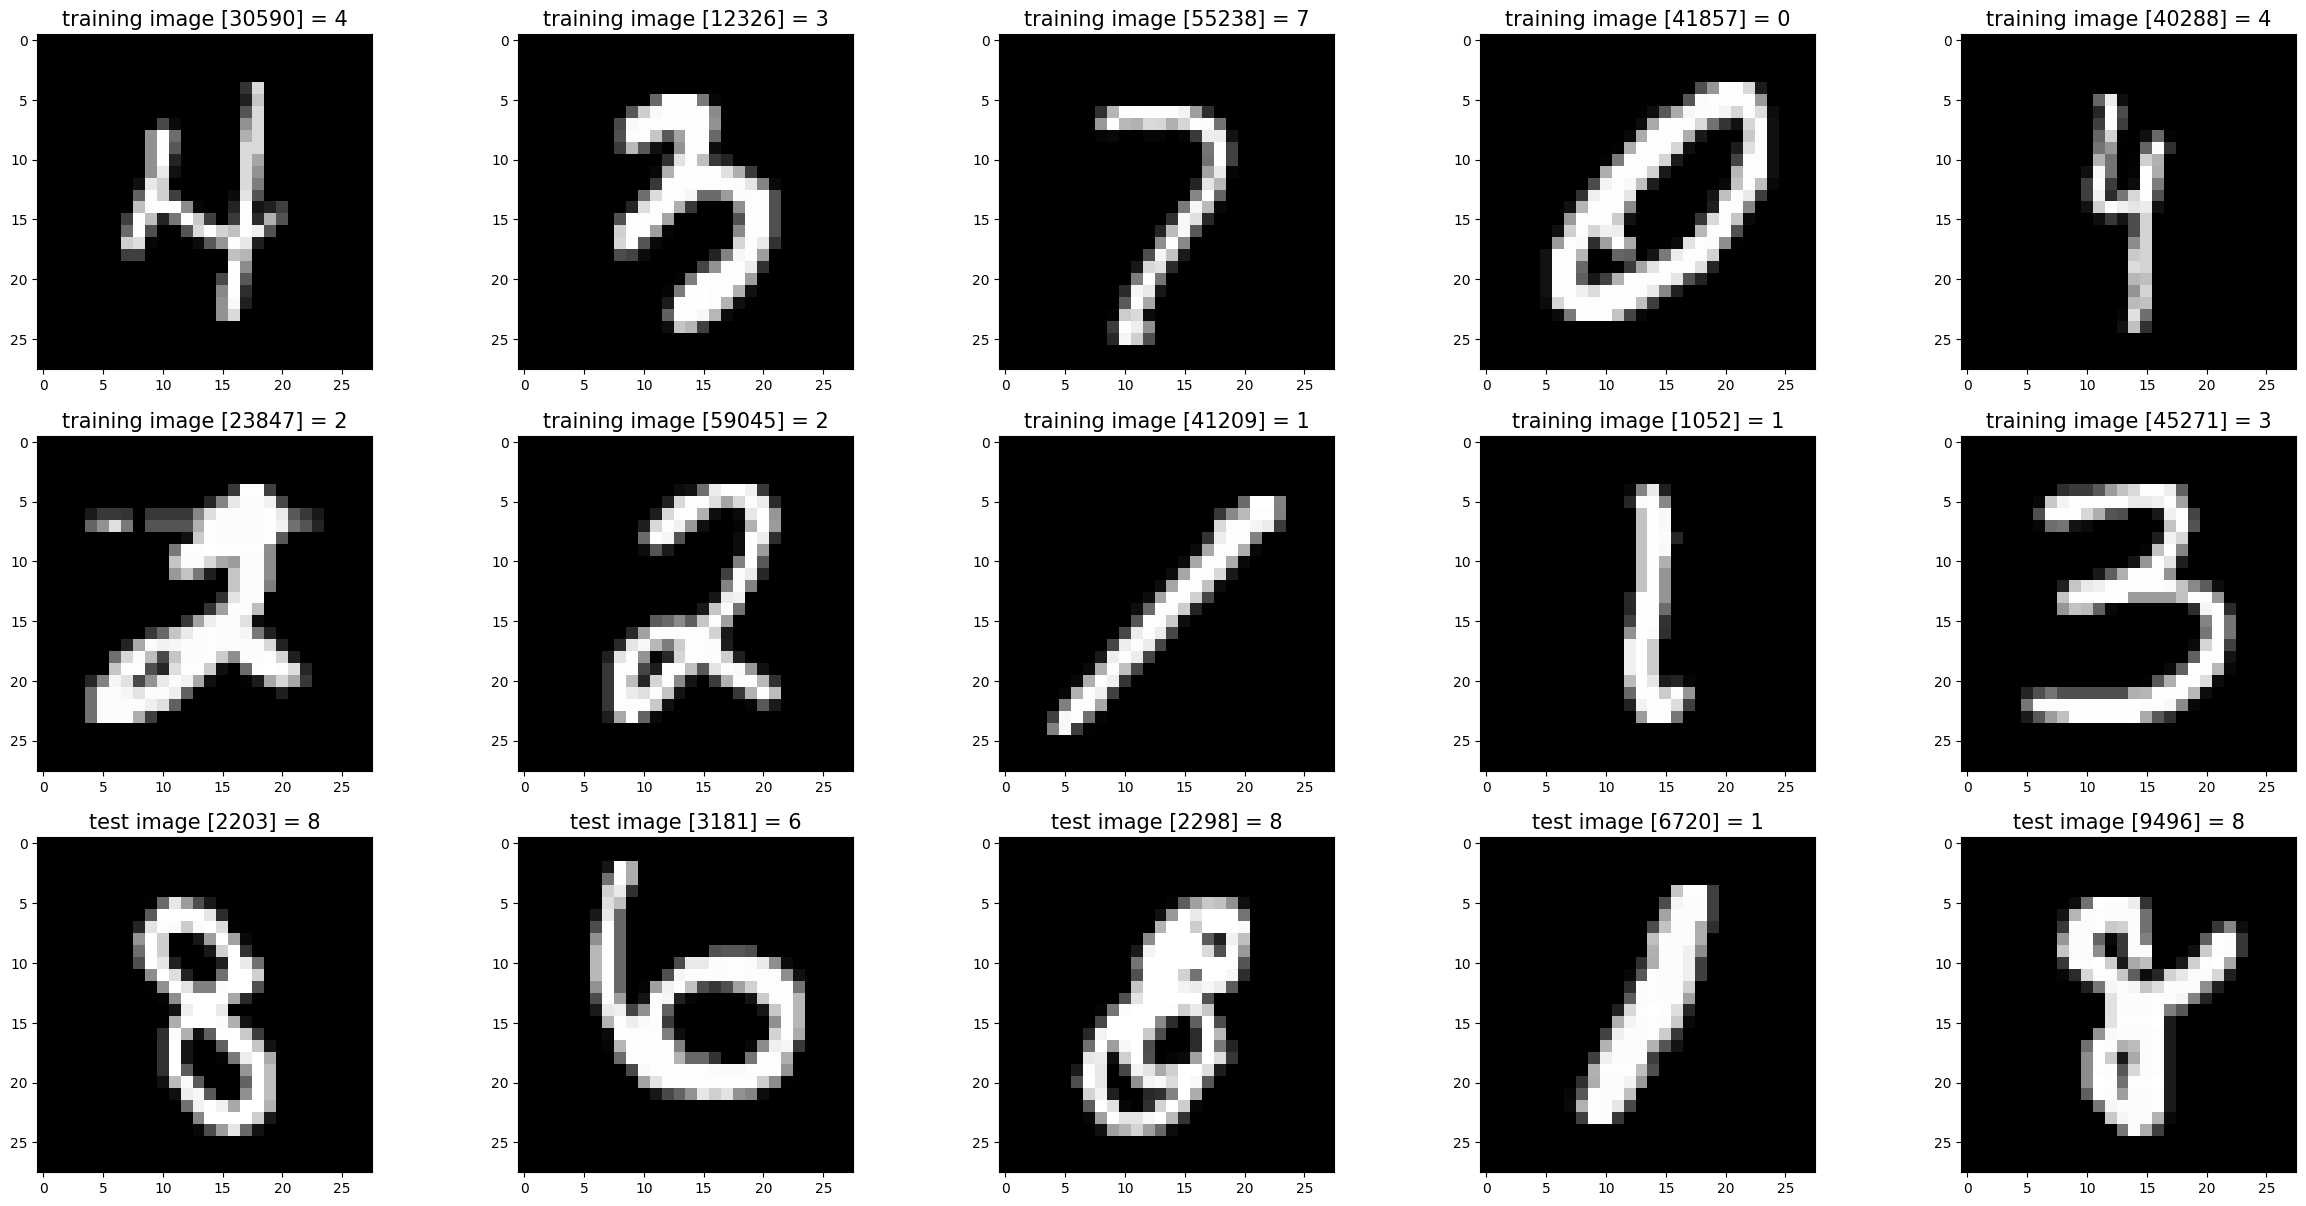

In [16]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/home/kishan/Documents/ds_assignment1/mnist/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)


In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [18]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [19]:
data = x_test
labels = y_test

In [20]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

### Defining necessary functions

In [21]:
def dist(p1, p2):
    return np.linalg.norm(p1-p2, ord=2)

In [22]:
def closest_center_dist(point, centers):
    d = None
    cc = None
    for center in centers:
        x = dist(point,center)
        if d is None:
            d = x
            cc = center
        elif x < d :
            d = x
            cc = center
    return d, cc

In [23]:
data.shape

(10000, 28, 28)

### K-Center

In [24]:
np.random.seed(42)
centers = [data[np.random.randint(0,10000)]]

In [25]:
def KCenter(data, centers):
    for i in range(9):
        print("Finding center:",i+2)
        d = None
        cc = None
        for point in data:
            x, xcc = closest_center_dist(point,centers)
            if d is None:
                d = x
                cc = point
            elif x > d:
                d = x
                cc = point
        centers.append(cc)
    return centers

centers = KCenter(data,centers)

Finding center: 2


Finding center: 3
Finding center: 4
Finding center: 5
Finding center: 6
Finding center: 7
Finding center: 8
Finding center: 9
Finding center: 10


In [26]:
len(centers)

10

### Centers of K-Center algorithm

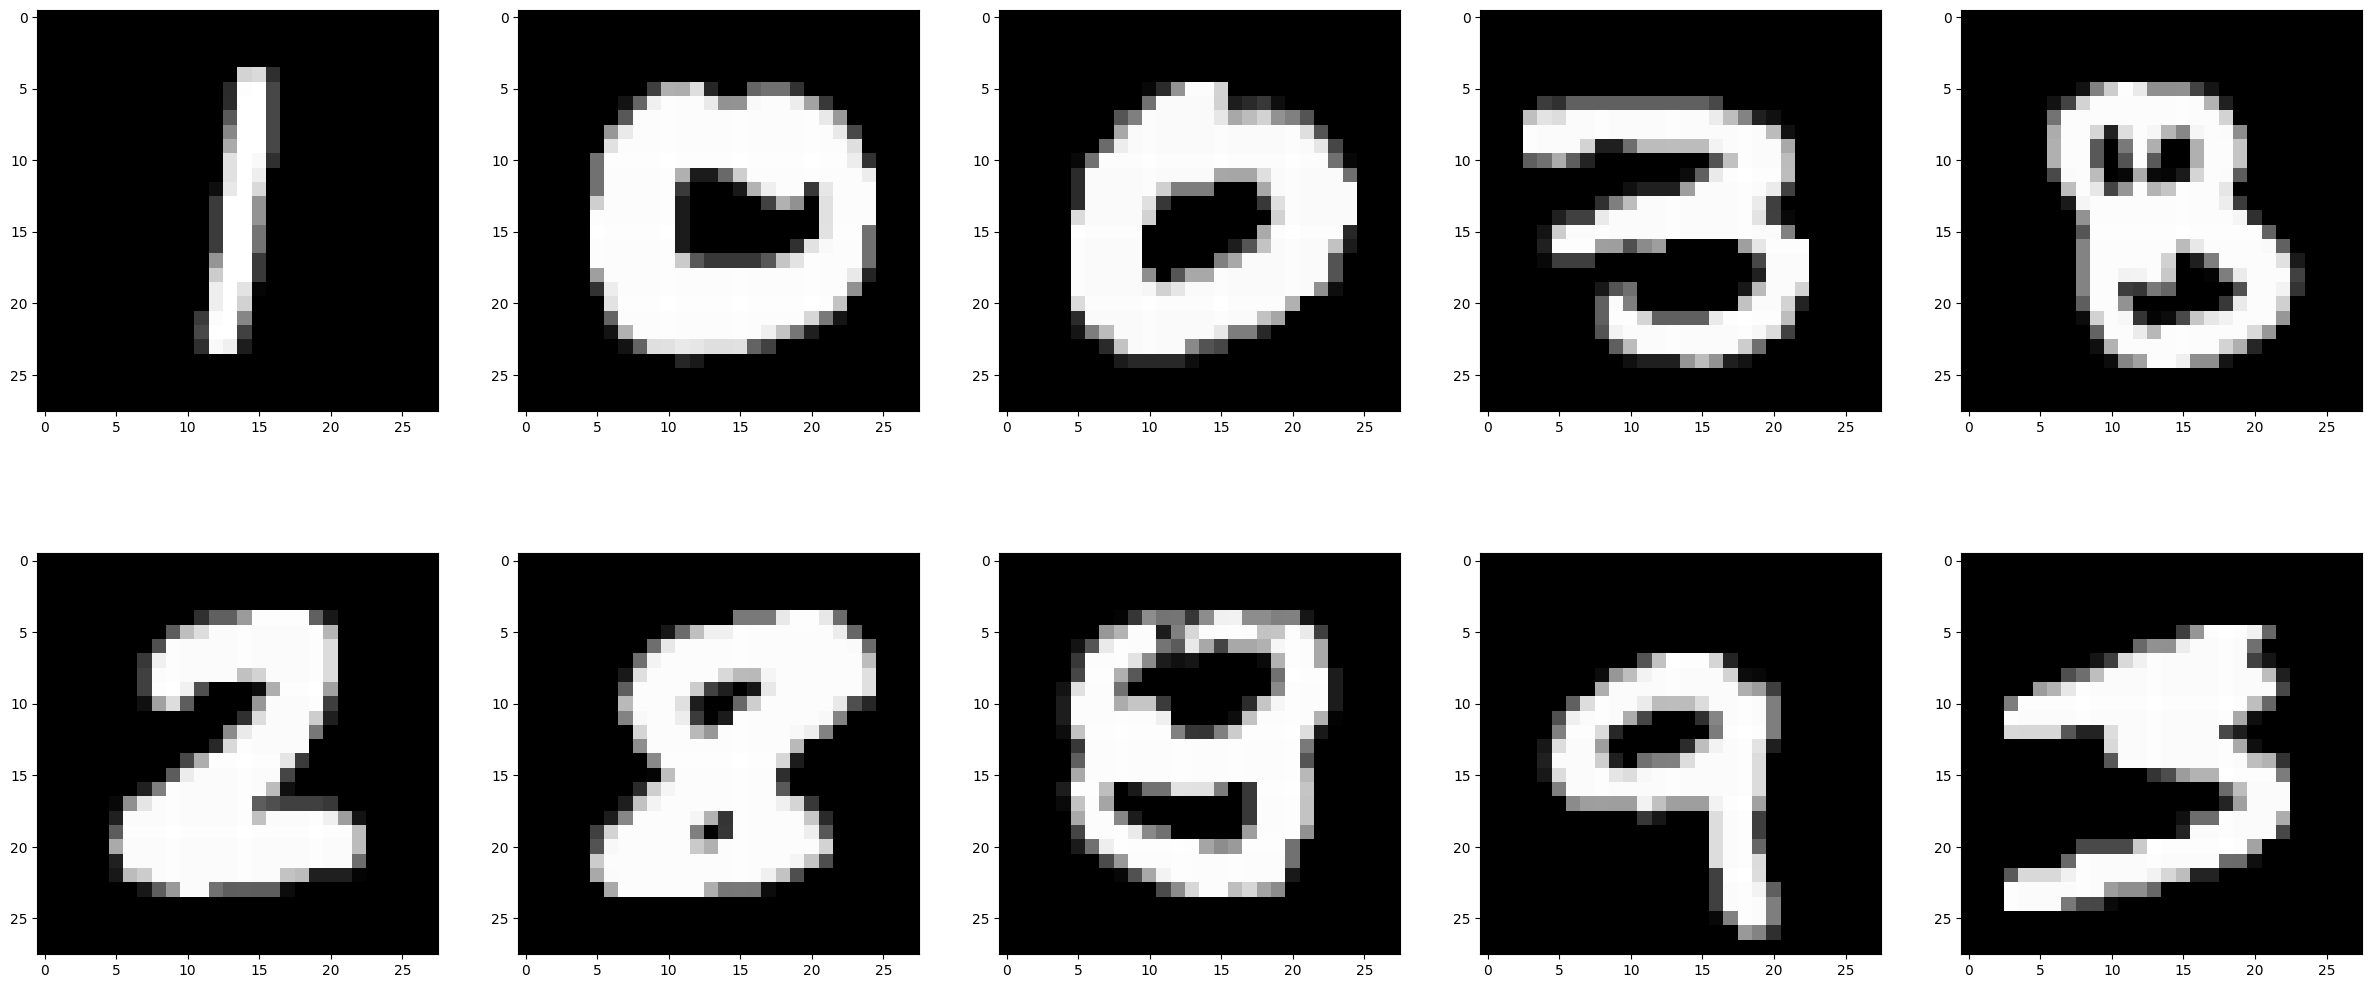

In [27]:
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    images_2_show.append(centers[i])
    titles_2_show.append('')
show_images(images_2_show, titles_2_show)

### Result of K-Center

In [28]:
from sklearn.metrics import rand_score

def clustering_result(data, centers):
    confusion_mat = np.zeros((10, 10))
    y_pred = [] # contains the closest center index of every point
    # y_pred need not store the actual digit indicated by majority points in the center as rand_score gives the same output for 2 shuffled arrays

    for i,point in enumerate(data):
        d,cc = closest_center_dist(point,centers)
        for j in range(len(centers)):
            if(np.array_equal(centers[j],cc)):
                confusion_mat[j][labels[i]]+=1
                y_pred.append(j)

    confusion_mat = confusion_mat.astype(int)



    print("Cluster wise labels:")
    print(confusion_mat)

    print()
    print("Majority labels in each cluster:")
    pred_labels = confusion_mat.argmax(axis=1)
    print(pred_labels)

    print()
    rand = rand_score(y_pred,labels)
    print("Rand Index:",rand)
    return confusion_mat, pred_labels, rand

print("K-Center results")
confusion_mat, pred_labels, rand = clustering_result(data, centers)

K-Center results
Cluster wise labels:
[[ 11 249  23  23  18  49  12  19  41  14]
 [172   1  26  22  13  35  76  16  15   7]
 [530  18  31  61  24  46 132 122  14  20]
 [  0   0   0   9   4   0   0   0   0   0]
 [  6   1   8  45  22  26   5   4  45   7]
 [  1  48 140  87  16   6   3  36  25  36]
 [243 762 753 645 553 639 702 698 756 629]
 [  0   0   3   2   6   1   1   0   2   0]
 [  4  15  22   5 309  14  17  75  16 255]
 [ 13  41  26 111  17  76  10  58  60  41]]

Majority labels in each cluster:
[1 0 0 3 3 2 1 4 4 3]

Rand Index: 0.5687067906790679


### K-Means++

Defining the lloyds function

In [29]:
def lloyds(data, centers):
    for j in range(5): # 5 iterations are run, though one or two are enough
        print("Iteration:",j+1)
        closest_center = [[],[],[],[],[],[],[],[],[],[]]

        for point in data:
            d, cc = closest_center_dist(point, centers)
            for i in range(len(centers)):
                if(np.array_equal(centers[i],cc)):
                    closest_center[i].append(point)
        for i in range(10):
            centers[i] = np.mean(np.stack(closest_center[i],axis=0),axis=0)
    return centers

Defining the KMeans++ function

In [40]:
def KMeans_plus_plus(data, centers):
    for i in range(9):
        print("Finding cetner",i+2)
        prob = []
        s = 0
        for point in data:
            p, cc = closest_center_dist(point, centers)
            prob.append(p**2)
            s += p**2
        prob/=s

        new_center = np.random.choice(np.arange(0,10000), p=prob)
        centers.append(data[new_center])
    centers = lloyds(data, centers)
    return centers

Doing KMeans++ clustering

In [41]:
np.random.seed(42)
centers = [data[np.random.randint(0,10000)]]

centers = KMeans_plus_plus(data, centers)

Finding cetner 1
Finding cetner 2
Finding cetner 3
Finding cetner 4
Finding cetner 5
Finding cetner 6
Finding cetner 7
Finding cetner 8
Finding cetner 9
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


### Centers of K-Means algorithm

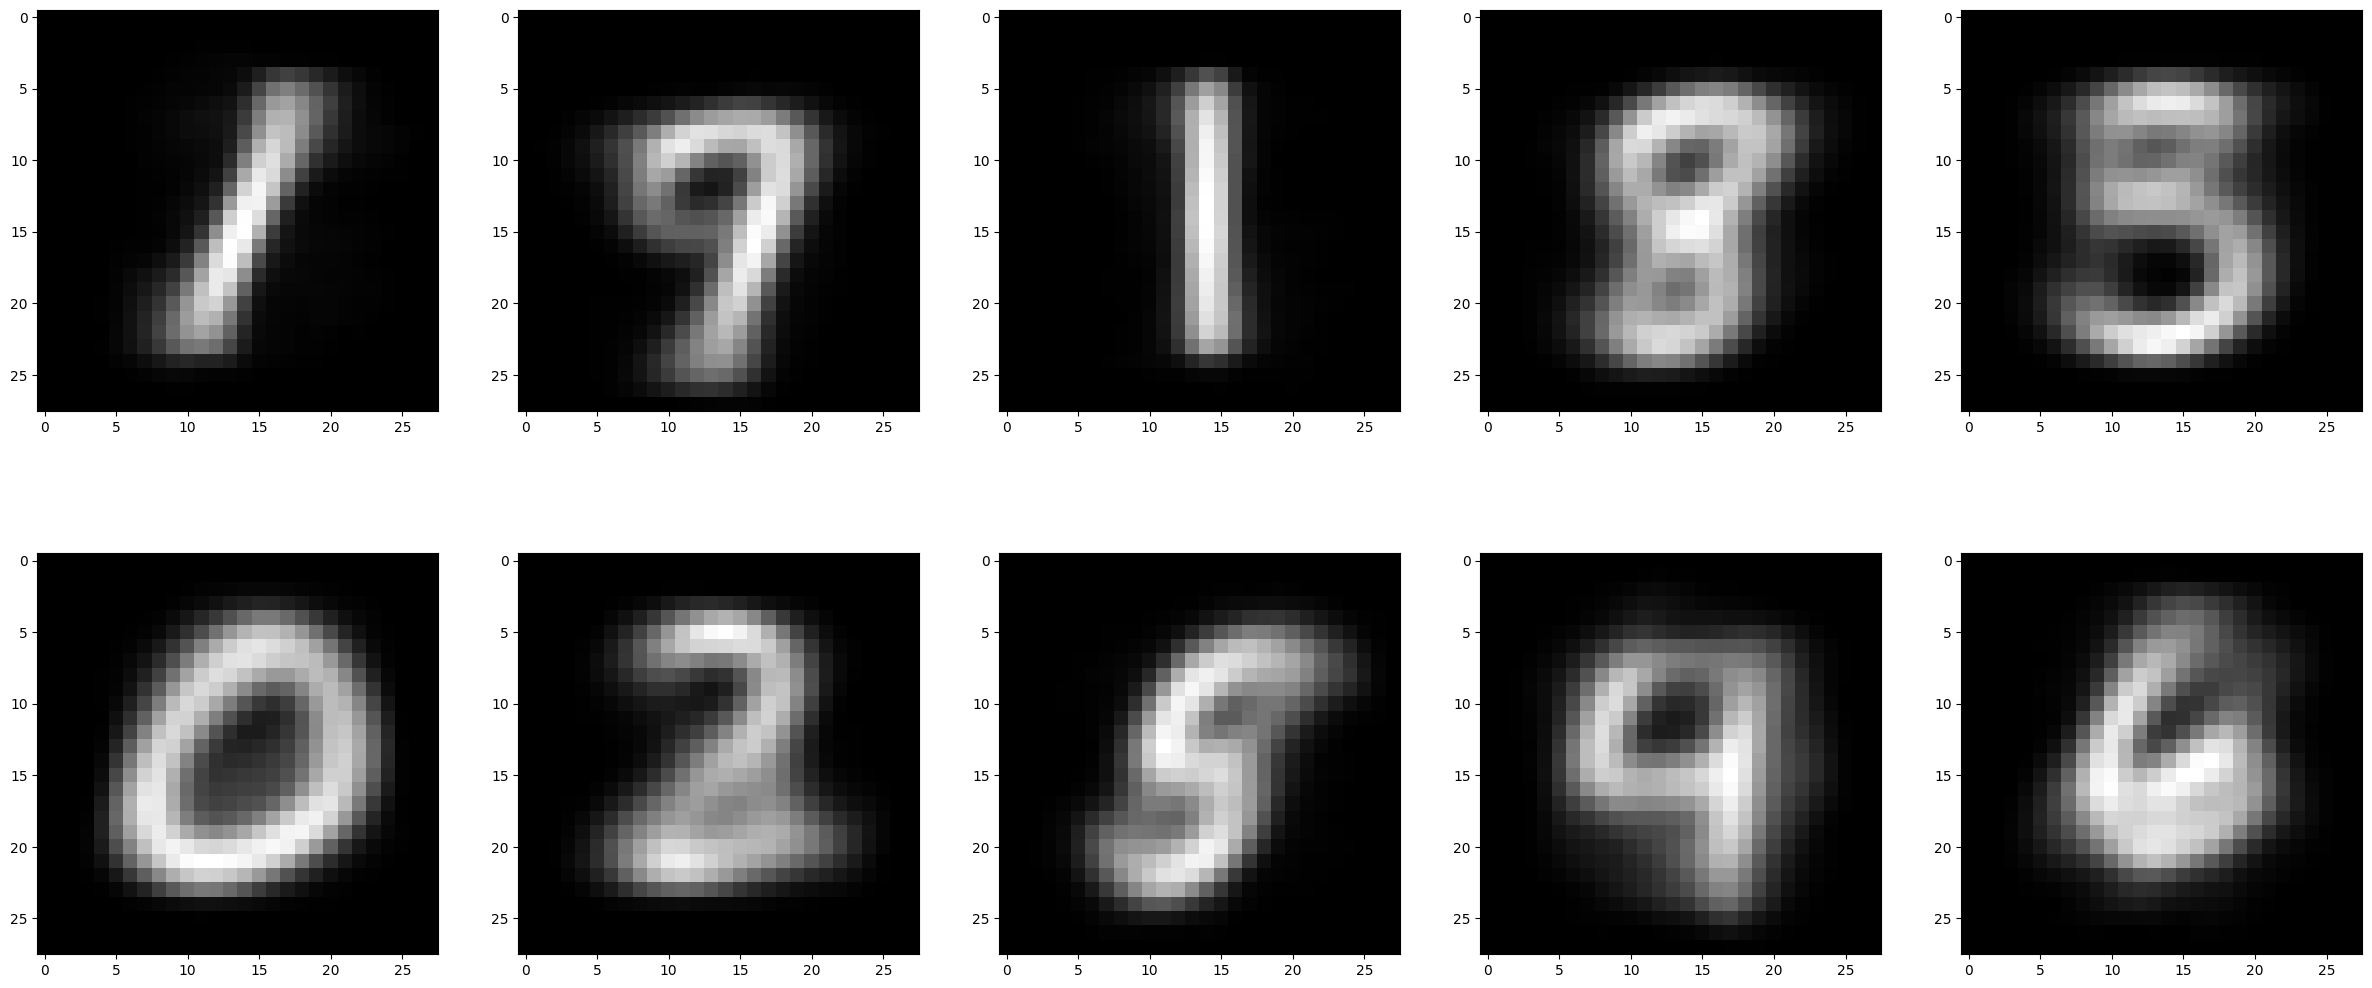

In [42]:
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    images_2_show.append(centers[i])
    titles_2_show.append('')
show_images(images_2_show, titles_2_show)

### Result of K-Means++

In [43]:
confusion_mat, pred_labels, rand = clustering_result(data, centers)

Cluster wise labels:
[[  2 629  57   8  11  45   4  61  26   6]
 [  1   1   6  23 110  27   0 729  17 451]
 [  0 490  12  21   8   6   1  23   5  15]
 [  2   2  34  86  18  48   3  42 435  59]
 [104   1  19 627   3 373  31   2 145  20]
 [759   0  40  11   4  14  93   3   9  10]
 [  0   5 574 128   1   4   1  11  49   1]
 [ 38   4  24  73  87 323 100  45 203  86]
 [ 47   0  65  26 573  40 153 100  52 320]
 [ 27   3 201   7 167  12 572  12  33  41]]

Majority labels in each cluster:
[1 7 1 8 3 0 2 5 4 6]

Rand Index: 0.8756582658265827
